In [1]:
# %matplotlib inline
import sys
sys.path.append('./features')

from combineData import get_final_data
import matplotlib.pyplot as plt

import preprocess1 as pre
from pcvr2 import get_cache_pcvr
from userFeatures import get_cache_user_features
from brandFeatures  import get_cache_brand_features
from itemFeatures import get_cache_item_features
from categoryFeatures import get_cache_category_features
from shopFeatures import get_cache_shop_features

from sklearn.metrics import log_loss

import lightgbm as lgb
import xgboost as xgb

import utils
import numpy as np
%matplotlib inline

/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = get_final_data()
# data = data[data['context_timestamp_day']!=18]

使用缓存数据...
共用390个特征


In [109]:
## 列出训练特征
features = []
# 广告相关的特征
features.extend(['item_id', 'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
            'item_collected_level', 'item_pv_level','item_category_1','item_category_2',])
# 用户相关的特征
features.extend(['user_gender_id', 'user_occupation_id','user_age_level', 'user_star_level',])
# 上下文相关的特征
features.extend(['context_page_id','context_timestamp_Hour','context_timestamp_weekday'])
# 店铺相关的特征
features.extend(['shop_id', 'shop_review_num_level', 'shop_star_level',
            'shop_review_positive_rate', 'shop_score_service', 'shop_score_delivery', 'shop_score_description',])
# pcvr特征
features.extend([
            'item_category_1_pcvr','item_category_1_C','item_category_1_I',
            'item_category_2_pcvr','item_category_2_C','item_category_2_I',
            'item_brand_id_pcvr','item_brand_id_C','item_brand_id_I',
            'item_city_id_pcvr','item_city_id_C','item_city_id_I',
            'item_price_level_pcvr','item_price_level_C','item_price_level_I',
            'item_sales_level_pcvr','item_sales_level_C','item_sales_level_I',
            'item_collected_level_pcvr','item_collected_level_C','item_collected_level_I',
            'item_pv_level_pcvr','item_pv_level_C','item_pv_level_I',
            'user_gender_id_pcvr','user_gender_id_C','user_gender_id_I',
            'user_age_level_pcvr','user_age_level_C','user_age_level_I',
            'user_occupation_id_pcvr','user_occupation_id_C','user_occupation_id_I',
            'user_star_level_pcvr','user_star_level_C','user_star_level_I',
            'context_timestamp_Hour_pcvr','context_timestamp_Hour_C','context_timestamp_Hour_I',
            'context_page_id_pcvr','context_page_id_C','context_page_id_I',
            'shop_review_num_level_pcvr','shop_review_num_level_C','shop_review_num_level_I',
            'shop_star_level_pcvr','shop_star_level_C','shop_star_level_I'])

# features+=utils.load_pickle(utils.temp_data_path+"brand_feature_name.plk")
# features+=utils.load_pickle(utils.temp_data_path+"shop_feature_name.plk")
# features+=utils.load_pickle(utils.temp_data_path+"item_feature_name.plk")
# features+=utils.load_pickle(utils.temp_data_path+"category_feature_name.plk")
# features+=utils.load_pickle(utils.temp_data_path+"user_feature_name.plk")

# features = [x for x in features if x.find('0d')==-1]
# features = [x for x in features if x.find('1d')==-1]
# features = [x for x in features if x.find('2d')==-1]
# features = [x for x in features if x.find('3d')==-1]
# features = [x for x in features if x.find('d_I')==-1]
# features = [x for x in features if x.find('d_C')==-1]
# features = [x for x in features if x.find('user_id')==-1]
# features = [x for x in features if x.find('_is_trade')==-1]


# features = [x for x in features if x.find('item_id')==-1]
# features = [x for x in features if x.find('user_id')==-1]

# features = [x for x in features if x!='item_id']
# features = [x for x in features if x!='item_brand_id_item_id_count']
# features = [x for x in features if x!='item_category_1_item_idcount_is_max']
# features = [x for x in features if x!='item_category_1_item_id_view_is_max']
# features = [x for x in features if x!='item_brand_id_item_idcount_is_max']
# features = [x for x in features if x!='item_brand_id_item_id_view_is_max']


# features = [x for x in features if x!='item_id_0d_pcvr']
# features = [x for x in features if x!='user_gender_id_item_id_0d_pcvr']

# features = [x for x in features if x!='user_age_level_item_id_0d_pcvr']

# features = [x for x in features if x!='user_occupation_id_item_id_0d_pcvr']

# features = [x for x in features if x.find('shop_id')==-1]

# features = [x for x in features if x.find('shop_id_count')==-1]

features += ['user_star_level_item_brand_id_0d_pcvr',
            'user_age_level_item_brand_id_0d_pcvr',
           'user_star_level_item_brand_id_0d_C',
           'user_age_level_item_brand_id_0d_C',
           'user_occupation_id_item_brand_id_0d_pcvr',
           'user_gender_id_item_brand_id_0d_pcvr',
           'item_brand_id_0d_pcvr',
           'user_star_level_item_category_1_0d_pcvr',
           'context_timestamp_Hour_pcvr',
           'user_age_level_item_category_1_2d_C']
len(features)

81

In [258]:
features

['item_brand_id',
 'item_city_id',
 'item_price_level',
 'item_sales_level',
 'item_collected_level',
 'item_pv_level',
 'item_category_1',
 'item_category_2',
 'user_gender_id',
 'user_occupation_id',
 'user_age_level',
 'user_star_level',
 'context_page_id',
 'context_timestamp_Hour',
 'context_timestamp_weekday',
 'shop_review_num_level',
 'shop_star_level',
 'shop_review_positive_rate',
 'shop_score_service',
 'shop_score_delivery',
 'shop_score_description',
 'item_category_1_pcvr',
 'item_category_1_C',
 'item_category_1_I',
 'item_category_2_pcvr',
 'item_category_2_C',
 'item_category_2_I',
 'item_brand_id_pcvr',
 'item_brand_id_C',
 'item_brand_id_I',
 'item_city_id_pcvr',
 'item_city_id_C',
 'item_city_id_I',
 'item_price_level_pcvr',
 'item_price_level_C',
 'item_price_level_I',
 'item_sales_level_pcvr',
 'item_sales_level_C',
 'item_sales_level_I',
 'item_collected_level_pcvr',
 'item_collected_level_C',
 'item_collected_level_I',
 'item_pv_level_pcvr',
 'item_pv_level_C',


In [12]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
temp_features = [x for x in features if x!='item_category_1']
temp_features = [x for x in features if x!='item_category_2']
temp_features = [x for x in features if x!='item_category_3']
train[temp_features] = imp.fit_transform(train[temp_features])
test[temp_features] = imp.transform(test[temp_features])

/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/share/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [115]:
from sklearn.model_selection import learning_curve
class ModelLGB(object):
    def __init__(self,n_estimators=200):
        self.model = lgb.LGBMClassifier(objective='binary',
                                        metric='binary_logloss',
                                       num_leaves=512,
                                       max_depth=-1,
                                       learning_rate=0.1,
                                       n_estimators=1000,
#                                        class_weight='balanced',
                                       subsample=0.2,
                                       colsample_bytree=0.1,
                                       reg_alpha=110,
                                       reg_lambda=60,
                                       random_state=2008,
                                       n_jobs=-1,
                                       silent=False,
#                                        categorical_feature=[0,1,6,7,8,9,13,14]
                                       )

    def fit(self,X,y):
        self.model.fit(X,y)

    def predict(self,data):
        y_predict = self.model.predict_proba(data)[:,1]
        return y_predict
    
    def plot_learning_curve(self,X,y,train_sizes = np.linspace(.1,1.0,5)):
        sizes,error_train,error_cv = learning_curve(self.model,X,y,train_sizes=train_sizes)
        plt.plot(sizes,np.mean(error_train,axis=1),'-o')
        plt.hold(True)
        plt.plot(sizes,np.mean(error_cv,axis=1),'-o')
        return sizes,error_train,error_cv

/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/usr/share/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/share/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


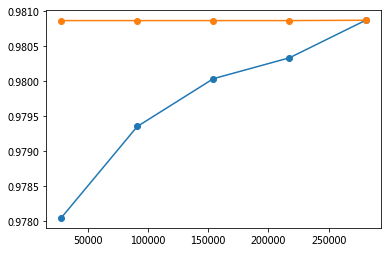

In [118]:
model = ModelLGB()
sizes,error_train,error_cv = model.plot_learning_curve(train[features],train['is_trade'])

In [116]:
train,test = utils.get_local_train_test(data)
model = ModelLGB()
model.fit(train[features],train['is_trade'])
test['predicted_score'] = model.predict(test[features])

score = utils.score(test)
print("按时间分 score: %.6f" % score)
print("平均：%.4f" % test['predicted_score'].mean())

按时间分 score: 0.087264
平均：0.0184


/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [117]:
import pandas as pd
p = model.model.feature_importance()
a = pd.DataFrame({'p':p,'f':features})
a.sort_values('p',ascending=False)

/usr/share/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function feature_importance is deprecated; Use attribute feature_importances_ instead.
  warnings.warn(msg, category=DeprecationWarning)


f   p
71     user_star_level_item_brand_id_0d_pcvr  86
72      user_age_level_item_brand_id_0d_pcvr  69
73        user_star_level_item_brand_id_0d_C  52
75  user_occupation_id_item_brand_id_0d_pcvr  30
74         user_age_level_item_brand_id_0d_C  28
59               context_timestamp_Hour_pcvr  26
79               context_timestamp_Hour_pcvr  21
14                    context_timestamp_Hour  21
76      user_gender_id_item_brand_id_0d_pcvr  19
77                     item_brand_id_0d_pcvr  14
32                         item_city_id_pcvr  10
29                        item_brand_id_pcvr   9
78   user_star_level_item_category_1_0d_pcvr   8
61                  context_timestamp_Hour_I   7
1                              item_brand_id   6
22                    shop_score_description   6
80       user_age_level_item_category_1_2d_C   6
16                                   shop_id   6
7                            item_category_1   6
21                       shop_score_delivery   5
31                           item_brand_id_I   5
24                         item_category_1_C   5
30                           item_brand_id_C   5
35                     item_price_level_pcvr   4
34                            item_city_id_I   4
50                       user_age_level_pcvr   4
0                                    item_id   4
20                        shop_score_service   4
38                     item_sales_level_pcvr   3
12                           user_star_level   3
..                                       ...  ..
3                           item_price_level   1
2                               item_city_id   1
26                      item_category_2_pcvr   1
70                         shop_star_level_I   0
69                         shop_star_level_C   0
10                        user_occupation_id   0
68                      shop_star_level_pcvr   0
64                         context_page_id_I   0
6                              item_pv_level   0
5                       item_collected_level   0
66                   shop_review_num_level_C   0
4                           item_sales_level   0
65                shop_review_num_level_pcvr   0
27                         item_category_2_C   0
63                         context_page_id_C   0
58                         user_star_level_I   0
57                         user_star_level_C   0
53                   user_occupation_id_pcvr   0
51                          user_age_level_C   0
15                 context_timestamp_weekday   0
48                          user_gender_id_C   0
47                       user_gender_id_pcvr   0
45                           item_pv_level_C   0
44                        item_pv_level_pcvr   0
43                    item_collected_level_I   0
42                    item_collected_level_C   0
39                        item_sales_level_C   0
37                        item_price_level_I   0
33                            item_city_id_C   0
54                      user_occupation_id_C   0

[81 rows x 2 columns]

In [135]:
temp_test = pd.read_csv("xgb6_ffm4_4_13.txt",sep=" ")
# temp_test = test.copy()
# temp_test.loc[test['predicted_score']>0.1,'predicted_score']=0.02
temp_test.loc[temp_test['predicted_score']<0.001,'predicted_score']=0.01
temp_test.to_csv("保留小数.csv",index=False,sep=" ")
# score = utils.score(temp_test)
# print("按时间分 score: %.6f" % score)
# print("平均：%.4f" % test['predicted_score'].mean())

In [36]:
train,test = utils.get_online_train_test(data)
model = ModelLGB()
model.fit(train[features],train['is_trade'])
test['predicted_score'] = model.predict(test[features])
test[['instance_id','predicted_score']].to_csv("保留小数.csv",index=False,sep=" ")

/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [274]:
for idx, val in enumerate(features):
    print(idx, val)

0 item_brand_id
1 item_city_id
2 item_price_level
3 item_sales_level
4 item_collected_level
5 item_pv_level
6 item_category_1
7 item_category_2
8 user_gender_id
9 user_occupation_id
10 user_age_level
11 user_star_level
12 context_page_id
13 context_timestamp_Hour
14 context_timestamp_weekday
15 shop_review_num_level
16 shop_star_level
17 shop_review_positive_rate
18 shop_score_service
19 shop_score_delivery
20 shop_score_description
21 item_category_1_pcvr
22 item_category_1_C
23 item_category_1_I
24 item_category_2_pcvr
25 item_category_2_C
26 item_category_2_I
27 item_brand_id_pcvr
28 item_brand_id_C
29 item_brand_id_I
30 item_city_id_pcvr
31 item_city_id_C
32 item_city_id_I
33 item_price_level_pcvr
34 item_price_level_C
35 item_price_level_I
36 item_sales_level_pcvr
37 item_sales_level_C
38 item_sales_level_I
39 item_collected_level_pcvr
40 item_collected_level_C
41 item_collected_level_I
42 item_pv_level_pcvr
43 item_pv_level_C
44 item_pv_level_I
45 user_gender_id_pcvr
46 user_gend

In [114]:
test[test['predicted_score']>0.2]['predicted_score'].count()

39

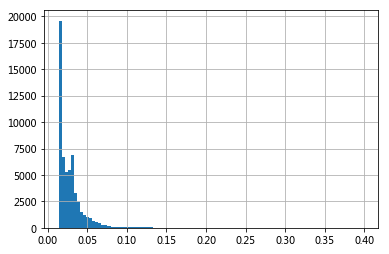

In [84]:
(test['predicted_score']+0.01).hist(bins=100)

In [75]:
import pandas as pd
pd.options.mode.chained_assignment = None

rs_train = []
rs_cv = []

for n in range(100,800,10):
    print(n)
    model = ModelLGB(n)
    model.fit(train[features],train['is_trade'])
    
    train.loc[:,'predicted_score'] = model.predict(train[features])
    rs_train.append(log_loss(train['is_trade'],train['predicted_score']))
    
    test.loc[:,'predicted_score'] = model.predict(test[features])
    rs_cv.append(utils.score(test))

100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790


/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/usr/share/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/share/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


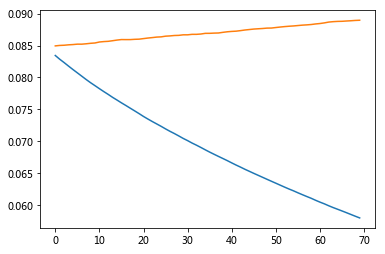

In [79]:
plt.plot(rs_train)
plt.hold(True)
plt.plot(rs_cv)

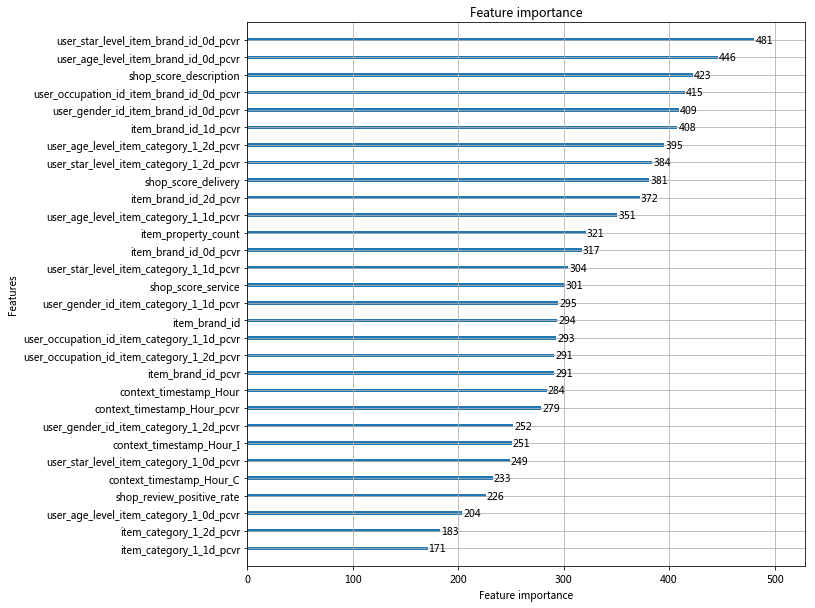

In [47]:
lgb.plot_importance(model.model,figsize=(10,10),max_num_features=30)

In [4]:
dtrain = xgb.DMatrix( data[features], label=features)

TypeError: must be real number, not str

In [11]:
data.T

KeyboardInterrupt: 

In [12]:
data.loc[:0,features].map(lambda x:print(x))

0
item_id                                     3412720377098676069
item_brand_id                               1975590437749032870
item_city_id                                3948283326616421003
item_price_level                                              3
item_sales_level                                              3
item_collected_level                                          4
item_pv_level                                                14
item_category_0                                               0
item_category_1                                               9
item_category_2                                               0
user_gender_id                                                1
user_occupation_id                                         2005
user_age_level                                             1003
user_star_level                                            3003
context_page_id                                            4006
context_timestamp_Hour                                       10
context_timestamp_weekday                                     1
shop_id                                     6765930309048922341
shop_review_num_level                                         4
shop_star_level                                            5002
shop_review_positive_rate                                     1
shop_score_service                                            1
shop_score_delivery                                           1
shop_score_description                                        1
item_category_1_pcvr                                  0.0179321
item_category_1_C                                          1130
item_category_1_I                                         63109
item_category_2_pcvr                                   0.018967
item_category_2_C                                          7944
item_category_2_I                                        418946
...                                                         ...
user_gender_id_item_category_1_0d_pcvr                0.0210777
user_gender_id_item_category_1_3d_pcvr                      NaN
user_age_level_item_category_1_1d_pcvr                      NaN
user_age_level_item_category_1_0d_pcvr                0.0167976
user_age_level_item_category_1_2d_pcvr                      NaN
user_age_level_item_category_1_3d_pcvr                      NaN
user_occupation_id_item_category_1_0d_pcvr            0.0172608
user_occupation_id_item_category_1_1d_pcvr                  NaN
user_occupation_id_item_category_1_3d_pcvr                  NaN
user_occupation_id_item_category_1_2d_pcvr                  NaN
user_star_level_item_category_1_1d_pcvr                     NaN
user_star_level_item_category_1_2d_pcvr                     NaN
user_star_level_item_category_1_3d_pcvr                     NaN
user_star_level_item_category_1_0d_pcvr               0.0186976
user_gender_id_2d_pcvr                                      NaN
user_gender_id_0d_pcvr                                0.0213322
user_gender_id_1d_pcvr                                      NaN
user_gender_id_3d_pcvr                                      NaN
user_age_level_0d_pcvr                                0.0182724
user_age_level_3d_pcvr                                      NaN
user_age_level_2d_pcvr                                      NaN
user_age_level_1d_pcvr                                      NaN
user_occupation_id_1d_pcvr                                  NaN
user_occupation_id_3d_pcvr                                  NaN
user_occupation_id_2d_pcvr                                  NaN
user_occupation_id_0d_pcvr                            0.0185721
user_star_level_0d_pcvr                               0.0199357
user_star_level_2d_pcvr                                     NaN
user_star_level_3d_pcvr                                     NaN
user_star_level_1d_pcvr                                     NaN

[173 rows x 1 columns]

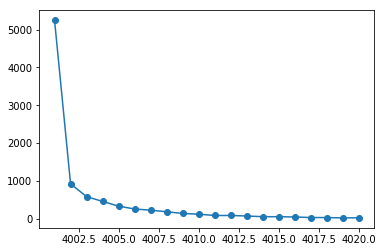

In [90]:
plt.plot(data[data['type']=='train'].groupby("context_page_id")['context_page_id_C'].mean(),'-o')

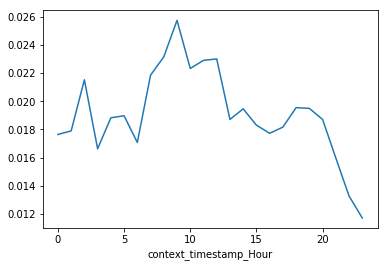

In [79]:
data[data['type']=='train'].groupby("context_timestamp_Hour")['context_timestamp_Hour_pcvr'].mean().plot()

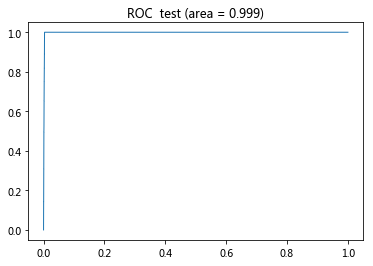

In [47]:
from sklearn.metrics import roc_curve,auc
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt

mean_tpr = 0.0  
mean_fpr = np.linspace(0, 1, 100)  
all_tpr = []

#画ROC曲线和计算AUC
fpr, tpr, thresholds = roc_curve(test['is_trade'], test['predicted_score'],pos_label = 1)##指定正例标签，pos_label = ###########在数之联的时候学到的，要制定正例
        
mean_tpr += interp(mean_fpr, fpr, tpr)          #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数  
mean_tpr[0] = 0.0                               #初始处为0  
roc_auc = auc(fpr, tpr)  
#画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来  
plt.plot(fpr, tpr, lw=1)
plt.title('ROC  %s (area = %0.3f)' % ('test', roc_auc)) 

In [59]:
from sklearn.metrics import classification_report
test['pre'] = 0;test[test['predicted_score']>0.5]=1;
print(classification_report(test['is_trade'],test['pre'],digits=10))

             precision    recall  f1-score   support

        0.0  0.9997512526 1.0000000000 0.9998756108     56268
        1.0  1.0000000000 0.9878577624 0.9938917976      1153

avg / total  0.9997562474 0.9997561868 0.9997554573     57421

